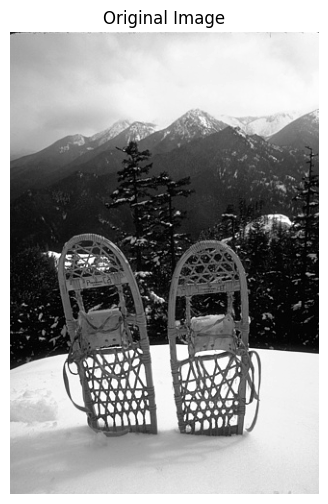

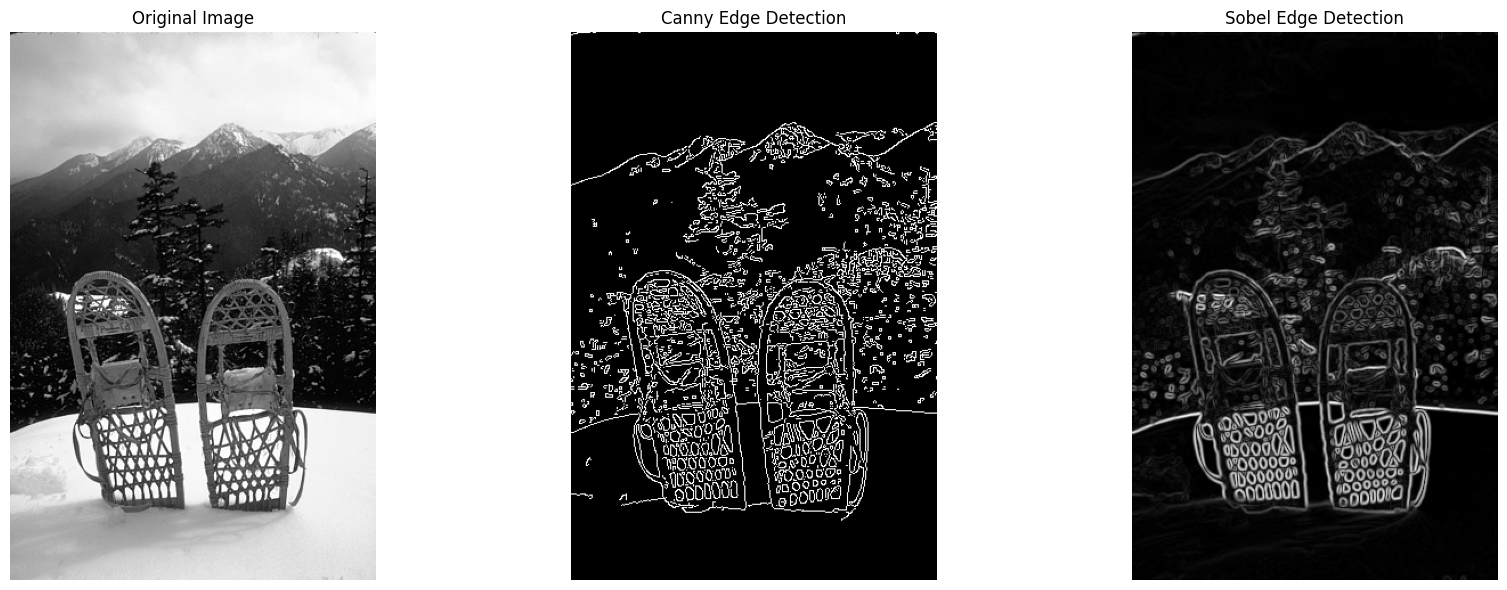

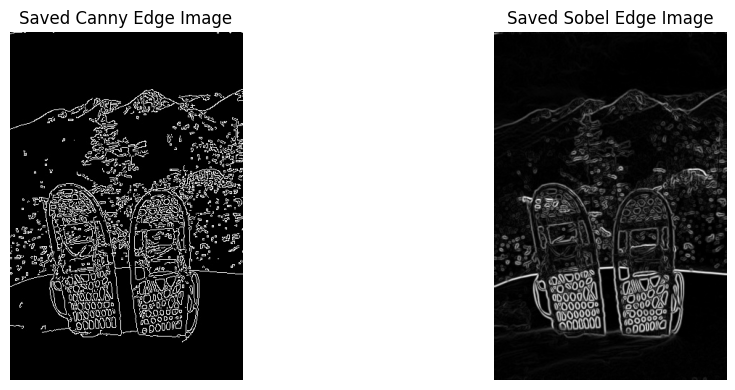

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Load image
image_path = "/Users/moh4n_ir/Downloads/edge-detection-assignment/data/sample_images/2018.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image loaded correctly
if image is None:
    print("Error: Image not found. Check the file path.")
else:
    # Display the original image
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")
    plt.show()

    # Apply Canny Edge Detection
    canny_edges = cv2.Canny(image, 100, 200)

    # Apply Sobel Edge Detection (combined X and Y)
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    sobel_edges = np.sqrt(sobelx**2 + sobely**2)

    # Normalize Sobel edges for visualization and saving
    sobel_edges_uint8 = cv2.normalize(sobel_edges, None, 0, 255, cv2.NORM_MINMAX)
    sobel_edges_uint8 = np.uint8(sobel_edges_uint8)

    # Display all results side by side
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(canny_edges, cmap='gray')
    plt.title("Canny Edge Detection")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(sobel_edges_uint8, cmap='gray')
    plt.title("Sobel Edge Detection")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

    # Save the edge maps
    output_dir = "data/sample_images"
    os.makedirs(output_dir, exist_ok=True)
    cv2.imwrite(os.path.join(output_dir, "sample1_canny.jpg"), canny_edges)
    cv2.imwrite(os.path.join(output_dir, "sample1_sobel.jpg"), sobel_edges_uint8)

    # Load saved images to verify saving worked
    canny_img = cv2.imread(os.path.join(output_dir, "sample1_canny.jpg"), cv2.IMREAD_GRAYSCALE)
    sobel_img = cv2.imread(os.path.join(output_dir, "sample1_sobel.jpg"), cv2.IMREAD_GRAYSCALE)

    if canny_img is not None and sobel_img is not None:
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(canny_img, cmap='gray')
        plt.title("Saved Canny Edge Image")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(sobel_img, cmap='gray')
        plt.title("Saved Sobel Edge Image")
        plt.axis("off")
        plt.tight_layout()
        plt.show()
    else:
        print("Error: One or both saved images could not be loaded. Check if the files were saved properly.")
